In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# **Bank (Churn Rate)**

## **EDA**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
link = "https://drive.google.com/file/d/1hx8WxB7JF2SoLcLpUzIMO244Y2Ve-aeI/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
df_bank = pd.read_csv(path)
display(df_bank.head(3))

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
display(df_bank.describe())
display(df_bank.describe(exclude=[float,int]))

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


- Dữ liệu có **10000 dòng và 12 cột**
- Cột **Customer_ID** không ảnh hưởng tới việc người đó có sử dụng tiếp dịch vụ hay không ==> Xóa bỏ
- Các cột hiện tại không quan sát thấy giá trị null
- Có 2 cột là object **Country,Gender** --> Encoding

## **Analyst**

[Text(0, 0, '7963'), Text(0, 0, '2037')]

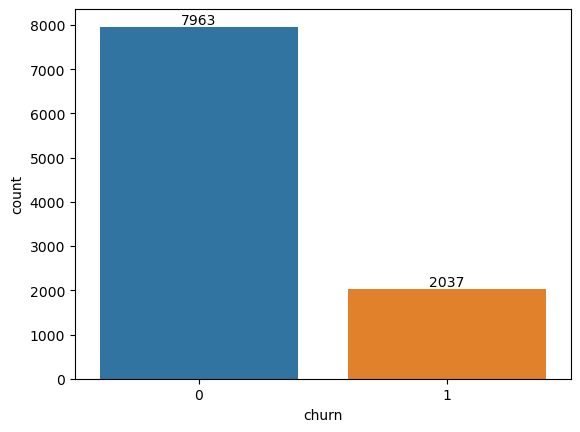

In [5]:
ax = sns.countplot(x='churn',data=df_bank)
ax.bar_label(ax.containers[0])

- Data này đang bị **imbalance** nặng: **Số lượng người tiếp tục sử dụng**= 7963 và **Số lượng người ngưng sử dụng dịch vụ**= 2037 ==> Xử lý imbalance

<Axes: xlabel='churn', ylabel='count'>

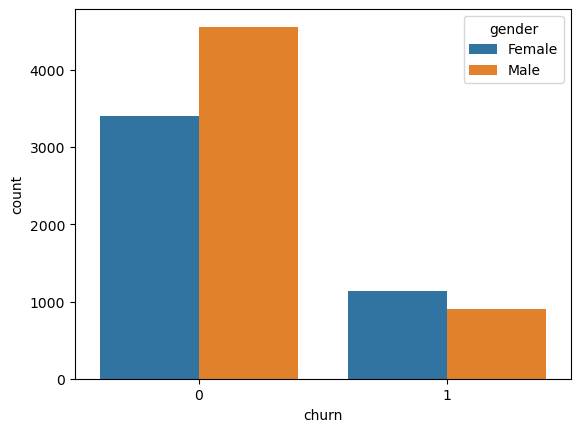

In [6]:
sns.countplot(x = "churn",hue="gender",data=df_bank)

- Trong những người tiếp tục sử dụng dịch vụ, tỉ lệ nam chiếm nhiều hơn nữ
- Trong những người không tiếp tục sử dụng dịch vụ, tỉ lệ nữ nhiều hơn nam

<Axes: >

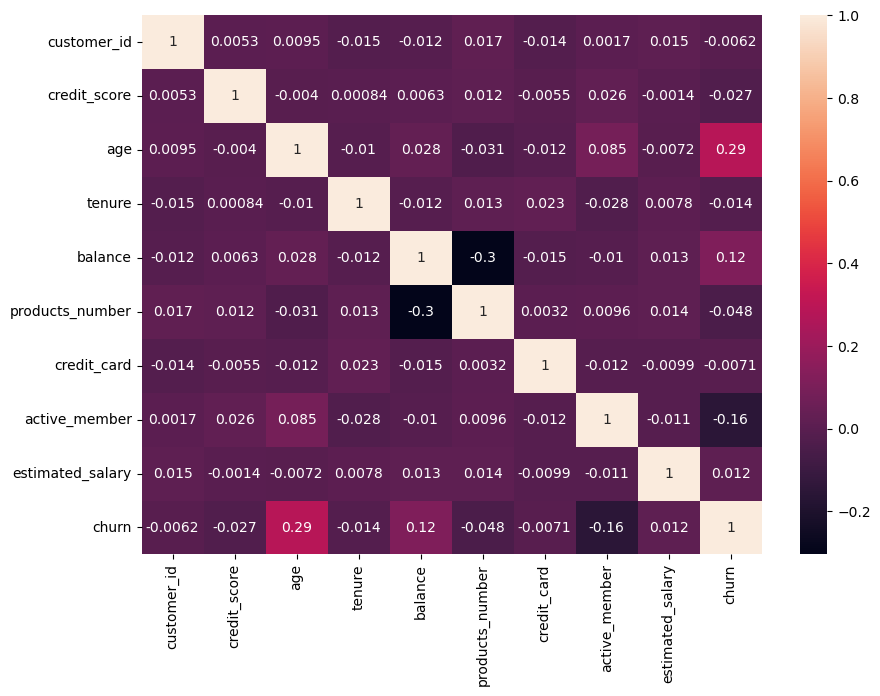

In [7]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_bank.corr(numeric_only=True),annot=True)

- Có thể thấy do dữ liệu hiện tại đang mất cân bằng nên không thể đánh giá độ tương quan một cách chính xác qua biểu đồ nhiết ==> Sau bước PreProcessing sẽ đánh giá sau

## **PreProcessing**

### Xử lý cột **CustomerID**

In [8]:
df_bank.drop(columns='customer_id')

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Xử lý Duplicated

In [9]:
df_bank.duplicated().sum()

0

- Data không có các giá trị duplicated ==> Không cần phải xử lý các giá trị duplicated

### Encoding

In [10]:
df_bank = pd.get_dummies(df_bank) 
# Sử dụng OneHotEncoder vì dữ liệu của các cột object có ít giá trị unqiue, 
# và số lượng cột hiện có cũng không quá nhiều
df_bank.head(5)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


<Axes: >

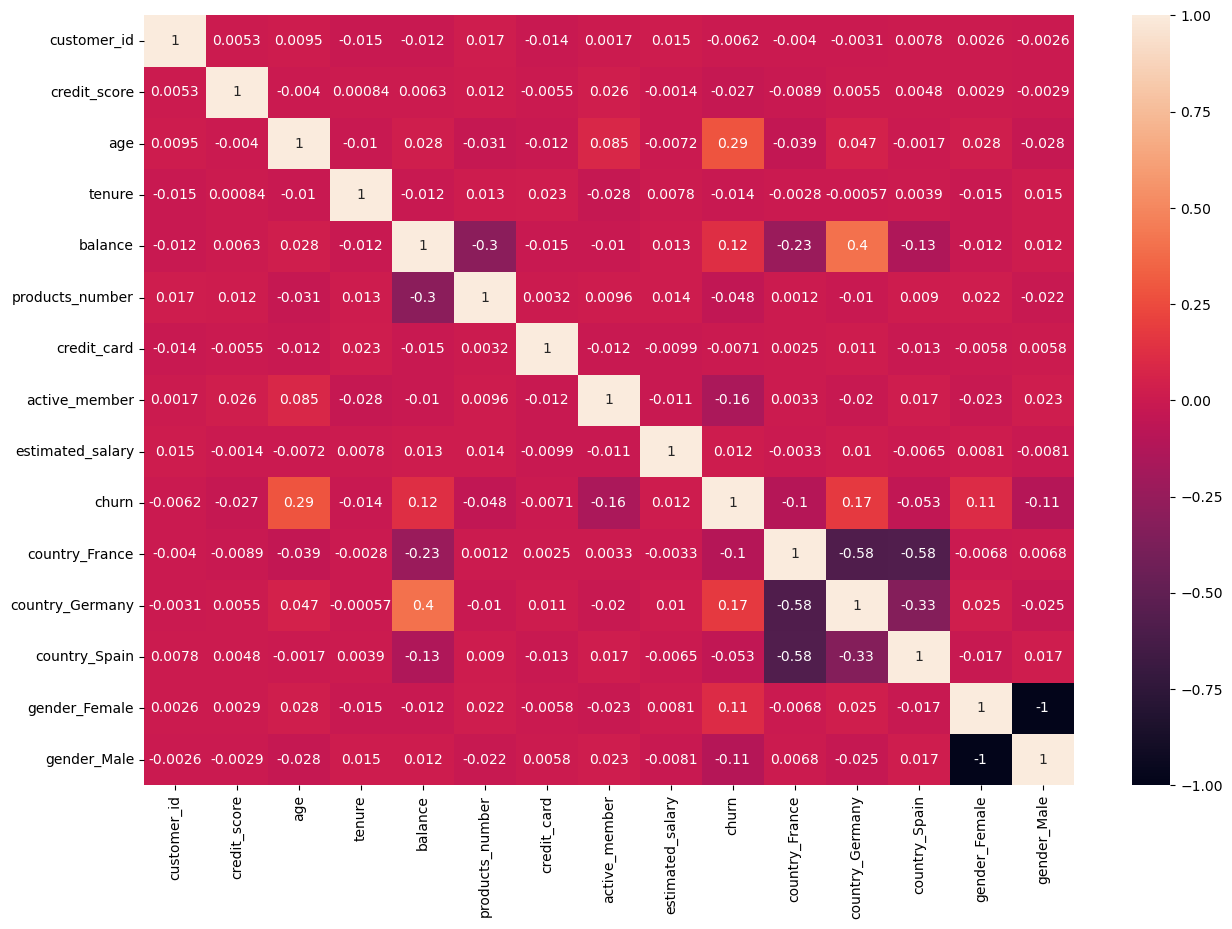

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_bank.corr(),annot=True)

- Sau khi Encoding và vẽ lại heatmap, có thể thấy những features ảnh hưởng nhiều đến **sự rời bỏ** của khách hàng gồm: **age,active_member,balance,France,Germany,Female,Male**
- Tuy nhiên sẽ không xóa cột nào hết vì những giá trị tương quan ở trên phân bố thấp đều và trường dữ liệu không quá lớn để xóa 

### Xử lý Imbalanced

In [12]:
df_bank['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

#### **UnderSamping ngẫu nhiên** --> df_under

Sử dụng **UnderSampling** để cắt ngẫu nhiêu dữ liệu bên **nhóm 0** để lấy ra 2037 hàng

In [13]:
df_0 = df_bank[df_bank.churn==0]
df_1 = df_bank[df_bank.churn==1]
df_0.shape, df_1.shape

((7963, 15), (2037, 15))

In [14]:
df_0_resapled=df_0.sample(2037)
df_0_resapled.shape

(2037, 15)

In [15]:
df_under = pd.concat([df_0_resapled, df_1])

<Axes: ylabel='count'>

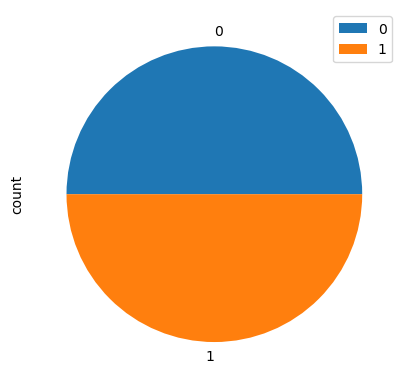

In [16]:
df_under['churn'].value_counts().plot.pie(legend = ["0", "1"])

In [17]:
df_under.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
9244,15697249,546,25,3,132837.70,1,1,0,131647.31,0,False,True,False,True,False
3883,15604355,519,39,1,97700.02,1,1,1,30709.03,0,True,False,False,False,True
9462,15737385,800,46,6,0.00,2,1,0,171928.04,0,False,False,True,True,False
2905,15694829,680,32,7,175454.00,1,0,1,77349.92,0,False,True,False,False,True
4158,15771580,850,38,0,106831.69,1,0,1,148977.72,0,True,False,False,True,False


#### **Under Sampling với thư viện Near Miss** --> X_under, y_under

In [18]:
y = df_bank["churn"].values
X = df_bank.drop(columns='churn').values

In [19]:
from imblearn.under_sampling import NearMiss
NearMiss_Model = NearMiss(version = 3) # Có 3 phương pháp NearMiss 1,2,3
X_under, y_under = NearMiss_Model.fit_resample(X, y)
X_under.shape, y_under.shape # Kích thước của X và y

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [ ]:
import numpy as np
np.count_nonzero(y_under == 0)

2037

In [ ]:
y_under.sum()

2037

#### **OverSampling ngẫu nhiên bằng RandomOverSampler** --> X_over, y_over

In [ ]:
from imblearn.over_sampling import RandomOverSampler
y = df_bank['churn'].values
X = df_bank.drop(columns='churn').values
ROS_model = RandomOverSampler()
X_over,y_over = ROS_model.fit_resample(X,y)
X_over.shape, y_over.shape

((15926, 14), (15926,))

In [ ]:
np.count_nonzero(y_over == 1)

7963

In [ ]:
np.count_nonzero(y_over == 0)

7963

#### **Oversampling bằng SMOTE** --> X_SM, y_SM

In [ ]:
from imblearn.over_sampling import SMOTE
y = df_bank["churn"].values #Load lại X, y tù bảng data gốc
X = df_bank.drop(columns='churn').values
SM_Model = SMOTE()
X_SM, y_SM = SM_Model.fit_resample(X, y)
X_SM.shape, y_SM.shape

((15926, 14), (15926,))

### Train Test Split và Scale Data

#### Train test split từ **df_under**

In [ ]:
from sklearn.model_selection import train_test_split
Xrd_train,Xrd_test,yrd_train,yrd_test = train_test_split(df_under.drop(columns='churn'),df_under.churn,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
model_scale = StandardScaler()
model_scale.fit(Xrd_train)
Xrd_train_scale = model_scale.transform(Xrd_train)
Xrd_test_scale = model_scale.transform(Xrd_test)

#### Train test split từ **X_under**,**y_under**

In [ ]:
Xu_train,Xu_test,yu_train,yu_test = train_test_split(X_under,y_under,test_size=0.3,random_state=42)
model_scale = StandardScaler()
model_scale.fit(Xu_train)
Xu_train_scale = model_scale.transform(Xu_train)
Xu_test_scale = model_scale.transform(Xu_test)

#### Train test split từ **X_over**,**y_over**

In [ ]:
Xo_train,Xo_test,yo_train,yo_test = train_test_split(X_over,y_over,test_size=0.3,random_state=42)
model_scale = StandardScaler()
model_scale.fit(Xo_train)
Xo_train_scale = model_scale.transform(Xo_train)
Xo_test_scale = model_scale.transform(Xo_test)

#### Train test split từ **X_SM**,**y_SM**

In [ ]:
Xsm_train,Xsm_test,ysm_train,ysm_test = train_test_split(X_SM,y_SM,test_size=0.3,random_state=42)
model_scale = StandardScaler()
model_scale.fit(Xsm_train)
Xsm_train_scale = model_scale.transform(Xsm_train)
Xsm_test_scale = model_scale.transform(Xsm_test)

## **Modeling**

### LIB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model_lrc = LogisticRegression()
model_svc = SVC()
model_knc = KNeighborsClassifier()
model_dtc = DecisionTreeClassifier()
model_nbc = GaussianNB()
model_rfc = RandomForestClassifier()

### **UnderSampling ngẫu nhiên** train and evaluate model

#### **Train Model**

In [ ]:
model_lrc.fit(Xrd_train_scale,yrd_train)
model_svc.fit(Xrd_train_scale,yrd_train)
model_knc.fit(Xrd_train_scale,yrd_train)
model_dtc.fit(Xrd_train_scale,yrd_train)
model_nbc.fit(Xrd_train_scale,yrd_train)
model_rfc.fit(Xrd_train_scale,yrd_train)

RandomForestClassifier()

#### **Evaluate Model**

##### Logistic Regression

In [ ]:
yrd_pred = model_lrc.predict(Xrd_train_scale)
print(classification_report(yrd_train,yrd_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1397
           1       0.71      0.71      0.71      1454

    accuracy                           0.71      2851
   macro avg       0.71      0.71      0.71      2851
weighted avg       0.71      0.71      0.71      2851



In [ ]:
yrd_pred = model_lrc.predict(Xrd_test_scale)
print(classification_report(yrd_test,yrd_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       640
           1       0.71      0.73      0.72       583

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



- Model **Logistic Regression** cho ra độ chính xác của hai tệp train test khá cao
- **Train**= 0.71, **Test**=0.73 (**Good Fitting**)

##### SVC

In [ ]:
yrd_pred = model_svc.predict(Xrd_train_scale)
print(classification_report(yrd_train,yrd_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1397
           1       0.83      0.81      0.82      1454

    accuracy                           0.82      2851
   macro avg       0.82      0.82      0.82      2851
weighted avg       0.82      0.82      0.82      2851



In [ ]:
yrd_pred = model_svc.predict(Xrd_test_scale)
print(classification_report(yrd_test,yrd_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       640
           1       0.76      0.73      0.74       583

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



- Model **SVC** cũng tương tự cho ra độ chính xác trên cả hai tệp tain test cao
- **Train**= 0.82, **Test**=0.76 (**Good Fitting**)

##### KNN Classifier

In [ ]:
yrd_pred = model_knc.predict(Xrd_train_scale)
print(classification_report(yrd_train,yrd_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1397
           1       0.82      0.79      0.81      1454

    accuracy                           0.81      2851
   macro avg       0.81      0.81      0.81      2851
weighted avg       0.81      0.81      0.81      2851



In [ ]:
yrd_pred = model_knc.predict(Xrd_test_scale)
print(classification_report(yrd_test,yrd_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       640
           1       0.69      0.68      0.69       583

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223



- Model **KNN Classifier** cho ra độ chính xác của tệp **Train** cao = 0.8 và **Test** cao = 0.7

##### Decision Tree Classifier

In [ ]:
yrd_pred = model_dtc.predict(Xrd_train_scale)
print(classification_report(yrd_train,yrd_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851



In [ ]:
yrd_pred = model_dtc.predict(Xrd_test_scale)
print(classification_report(yrd_test,yrd_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       640
           1       0.67      0.69      0.68       583

    accuracy                           0.69      1223
   macro avg       0.69      0.69      0.69      1223
weighted avg       0.69      0.69      0.69      1223



- Model **Decision Tree Classifier** có độ chính xác 100% trên tệp **train**,  tệp **test** = 69%

##### GaussianNB

In [ ]:
yrd_pred = model_nbc.predict(Xrd_train_scale)
print(classification_report(yrd_train,yrd_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1397
           1       0.72      0.69      0.70      1454

    accuracy                           0.71      2851
   macro avg       0.71      0.71      0.71      2851
weighted avg       0.71      0.71      0.71      2851



In [ ]:
yrd_pred = model_nbc.predict(Xrd_test_scale)
print(classification_report(yrd_test,yrd_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       640
           1       0.71      0.66      0.69       583

    accuracy                           0.71      1223
   macro avg       0.71      0.71      0.71      1223
weighted avg       0.71      0.71      0.71      1223



- Model **GaussianNB** cho độ chính xác trên cả hai tệp là bằng nhau
- **Train**= 0.71, **Test**= 0.71

##### Random Forest Classifier

In [ ]:
yrd_pred = model_rfc.predict(Xrd_train_scale)
print(classification_report(yrd_train,yrd_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851



In [ ]:
yrd_pred = model_rfc.predict(Xrd_test_scale)
print(classification_report(yrd_test,yrd_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       640
           1       0.77      0.73      0.75       583

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



- Model **Random Forest Classifier** có độ chính xác trên tệp **Train** là 100% và **Test** là 77%

#### **Conclusion 1**


- Sau khi xử lý dữ liệu bằng mất cân bằng bằng phương pháp **UnderSampling ngẫu nhiên**, model hoạt động tốt nhất và cho ra độ chính xác cao nhất là **Random Forest**
- Độ chính xác ở tệp **Train** = **100%** và ở tệp **Test** = xấp xỉ **77%**
- Tuy nhiên, cần evaluate thêm model ở các cách xử lý imbalance khác để tìm ra model có chỉ số cao nhất

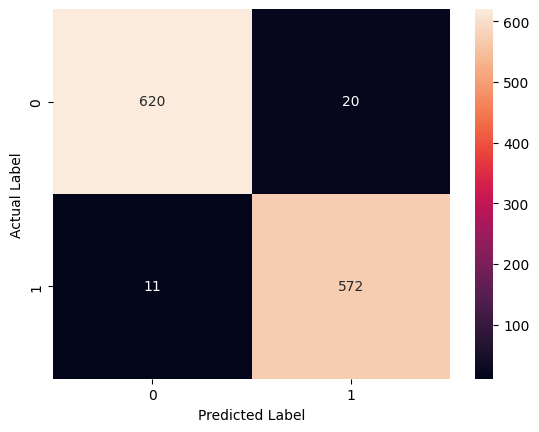

In [ ]:
yrd_pred_svc = model_rfc.predict(Xrd_test_scale)
acc = accuracy_score(yrd_test, yrd_pred_svc)
cm = confusion_matrix(yrd_test, yrd_pred_svc)
sns.heatmap(cm, annot = True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

- **True Positive** = 572
- **True Negative** = 620
- **False Positive** = 20
- **False Negative** = 11

### **UnderSampling NearMiss** train and evaluate model

#### **Train Model**

In [ ]:
model_lrc.fit(Xu_train_scale,yu_train)
model_svc.fit(Xu_train_scale,yu_train)
model_knc.fit(Xu_train_scale,yu_train)
model_dtc.fit(Xu_train_scale,yu_train)
model_nbc.fit(Xu_train_scale,yu_train)
model_rfc.fit(Xu_train_scale,yu_train)

RandomForestClassifier()

#### **Evaluate Model**

##### Logistic Regression

In [ ]:
yu_pred = model_lrc.predict(Xu_train_scale)
print(classification_report(yu_train,yu_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1397
           1       0.72      0.70      0.71      1454

    accuracy                           0.71      2851
   macro avg       0.71      0.71      0.71      2851
weighted avg       0.71      0.71      0.71      2851



In [ ]:
yu_pred = model_lrc.predict(Xu_test_scale)
print(classification_report(yu_test,yu_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.71       640
           1       0.68      0.73      0.70       583

    accuracy                           0.71      1223
   macro avg       0.71      0.71      0.71      1223
weighted avg       0.71      0.71      0.71      1223



- Model **Logistic Regression** có độ chính xác trên cả hai tệp train test ở mức khá cao
- **Train**= 0.71, **Test**= 0.71 (**Good Fitting**)

##### SVC

In [ ]:
yu_pred = model_svc.predict(Xu_train_scale)
print(classification_report(yu_train,yu_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1397
           1       0.84      0.77      0.80      1454

    accuracy                           0.80      2851
   macro avg       0.81      0.80      0.80      2851
weighted avg       0.81      0.80      0.80      2851



In [ ]:
yu_pred = model_lrc.predict(Xu_test_scale)
print(classification_report(yu_test,yu_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.71       640
           1       0.68      0.73      0.70       583

    accuracy                           0.71      1223
   macro avg       0.71      0.71      0.71      1223
weighted avg       0.71      0.71      0.71      1223



- Model **SVC** có độ chính xác cao trên cả 2 tệp train và test
- **Train**= 0.8, **Test**= 0.71 (**Good Fitting**)

##### KNN Classifier

In [ ]:
yu_pred = model_knc.predict(Xu_train_scale)
print(classification_report(yu_train,yu_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1397
           1       0.83      0.79      0.81      1454

    accuracy                           0.81      2851
   macro avg       0.81      0.81      0.81      2851
weighted avg       0.81      0.81      0.81      2851



In [ ]:
yu_pred = model_knc.predict(Xu_test_scale)
print(classification_report(yu_test,yu_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       640
           1       0.68      0.67      0.68       583

    accuracy                           0.70      1223
   macro avg       0.70      0.69      0.69      1223
weighted avg       0.70      0.70      0.70      1223



- Model **KNN** có độ chính xác tương tự như **SVC**, cao trên cả 2 tệp train và test
- **Train**= 0.81, **Test**= 0.7

##### GaussianNB

In [ ]:
yu_pred = model_nbc.predict(Xu_train_scale)
print(classification_report(yu_train,yu_pred))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1397
           1       0.75      0.65      0.70      1454

    accuracy                           0.71      2851
   macro avg       0.71      0.71      0.71      2851
weighted avg       0.72      0.71      0.71      2851



In [ ]:
yu_pred = model_nbc.predict(Xu_test_scale)
print(classification_report(yu_test,yu_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       640
           1       0.73      0.65      0.68       583

    accuracy                           0.72      1223
   macro avg       0.72      0.71      0.71      1223
weighted avg       0.72      0.72      0.71      1223



- Model **GaussianNB** có độ chính xác ở cả 2 tệp train test ở mức cao
- **Train**= 0.71, **Test**= 0.72

##### Decision Tree Classifier

In [ ]:
yu_pred = model_dtc.predict(Xu_train_scale)
print(classification_report(yu_train,yu_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851



In [ ]:
yu_pred = model_dtc.predict(Xu_test_scale)
print(classification_report(yu_test,yu_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       640
           1       0.68      0.69      0.69       583

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223



##### Random Forest Classifier

In [ ]:
yu_pred = model_rfc.predict(Xu_train_scale)
print(classification_report(yu_train,yu_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851



In [ ]:
yu_pred = model_rfc.predict(Xu_test_scale)
print(classification_report(yu_test,yu_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       640
           1       0.77      0.75      0.76       583

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



- Model **Decision Tree** và **Random Forest** có độ chính xác gần như khá tương đồng
- Tuy nhiên, model **Random Forest** có độ chính xác ở tệp **Test** cao hơn với 77%

#### **Conclusion 2**

- Sau khi evaluate model dựa trên cách xử lý imbalanced data = **UnderSampling NearMiss**, **Random Forest Classifier** là model có độ chính xác cao nhất
- **Train**= 1, **Test**= 0.77

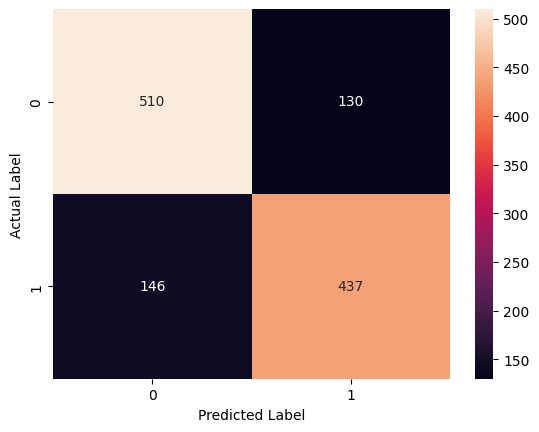

In [ ]:
yu_test_pred = model_rfc.predict(Xu_test_scale)
yu_test_pred
acc = accuracy_score(yu_test, yu_test_pred)
cm = confusion_matrix(yu_test, yu_test_pred)
sns.heatmap(cm, annot = True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

- **True Positive** = 437
- **True Negative** = 510
- **False Positive** = 130
- **False Negative** = 146
- Có thể thấy sử dụng **NearMiss** đang cho ra độ chính xác dự đoán thấp hơn một ít so với **UnderSampling ngẫu nhiên**

### **RandomOverSampler** train and evaluate model 

#### **Train Model**

In [ ]:
model_lrc.fit(Xo_train_scale,yo_train)
model_svc.fit(Xo_train_scale,yo_train)
model_knc.fit(Xo_train_scale,yo_train)
model_dtc.fit(Xo_train_scale,yo_train)
model_nbc.fit(Xo_train_scale,yo_train)
model_rfc.fit(Xo_train_scale,yo_train)

RandomForestClassifier()

#### **Evaluate Model**

##### Logistic Regression

In [ ]:
yo_pred = model_lrc.predict(Xo_train_scale)
print(classification_report(yo_train,yo_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      5537
           1       0.72      0.71      0.71      5611

    accuracy                           0.71     11148
   macro avg       0.71      0.71      0.71     11148
weighted avg       0.71      0.71      0.71     11148



In [ ]:
yo_pred = model_lrc.predict(Xo_test_scale)
print(classification_report(yo_test,yo_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2426
           1       0.70      0.70      0.70      2352

    accuracy                           0.71      4778
   macro avg       0.71      0.71      0.71      4778
weighted avg       0.71      0.71      0.71      4778



- Model **Logistic Regression** có độ chính xác tương tự các model trước

##### SVC

In [ ]:
yo_pred = model_svc.predict(Xo_train_scale)
print(classification_report(yo_train,yo_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5537
           1       0.83      0.81      0.82      5611

    accuracy                           0.82     11148
   macro avg       0.82      0.82      0.82     11148
weighted avg       0.82      0.82      0.82     11148



In [ ]:
yo_pred = model_svc.predict(Xo_test_scale)
print(classification_report(yo_test,yo_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2426
           1       0.79      0.79      0.79      2352

    accuracy                           0.80      4778
   macro avg       0.80      0.80      0.80      4778
weighted avg       0.80      0.80      0.80      4778



- Model **SVC** có độ chính xác cao hơn so với 2 model SVC trước
- **Train**= 0.82, **Test**= 0.8 (lý tưởng)

##### KNN Classifier

In [ ]:
yo_pred = model_knc.predict(Xo_train_scale)
print(classification_report(yo_train,yo_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      5537
           1       0.83      0.93      0.88      5611

    accuracy                           0.87     11148
   macro avg       0.88      0.87      0.87     11148
weighted avg       0.88      0.87      0.87     11148



In [ ]:
yo_pred = model_knc.predict(Xo_test_scale)
print(classification_report(yo_test,yo_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.79      2426
           1       0.77      0.85      0.81      2352

    accuracy                           0.80      4778
   macro avg       0.80      0.80      0.80      4778
weighted avg       0.80      0.80      0.80      4778



- Model **KNN** có độ chính xác trên tệp train cao hơn so với tệp test
- **Train**= 0.87, **Test**= 0.8

##### Gaussian NB

In [ ]:
yo_pred = model_nbc.predict(Xo_train_scale)
print(classification_report(yo_train,yo_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      5537
           1       0.73      0.68      0.70      5611

    accuracy                           0.71     11148
   macro avg       0.71      0.71      0.71     11148
weighted avg       0.71      0.71      0.71     11148



In [ ]:
yo_pred = model_nbc.predict(Xo_test_scale)
print(classification_report(yo_test,yo_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      2426
           1       0.70      0.69      0.70      2352

    accuracy                           0.71      4778
   macro avg       0.71      0.71      0.71      4778
weighted avg       0.71      0.71      0.71      4778



- Model **GaussianNB** có độ chính xác = Model **Logistic Regression**

##### Decision Tree Classifier

In [ ]:
yo_pred = model_dtc.predict(Xo_train_scale)
print(classification_report(yo_train,yo_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5537
           1       1.00      1.00      1.00      5611

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148



In [ ]:
yo_pred = model_svc.predict(Xo_test_scale)
print(classification_report(yo_test,yo_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2426
           1       0.79      0.79      0.79      2352

    accuracy                           0.80      4778
   macro avg       0.80      0.80      0.80      4778
weighted avg       0.80      0.80      0.80      4778



##### Random Forest Classifier

In [ ]:
yo_pred = model_rfc.predict(Xo_train_scale)
print(classification_report(yo_train,yo_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5537
           1       1.00      1.00      1.00      5611

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148



In [ ]:
yo_pred = model_rfc.predict(Xo_test_scale)
print(classification_report(yo_test,yo_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2426
           1       0.91      0.98      0.94      2352

    accuracy                           0.94      4778
   macro avg       0.94      0.94      0.94      4778
weighted avg       0.94      0.94      0.94      4778



- Với 2 model **Decision Tree** và **Random Forest**, cả hai đều cho ra độ chính xác ở tệp train tương đồng.
- Nhưng ở tệp test, model có độ chính xác cao nhất là **Random Forest Classifier** = 94%

#### **Conclusion 3**

- Với kỹ thuật xử lý dữ liệu imbalanced = **RandomOverSample** độ chính xác của các model tăng lên một cách đáng kể
- Model có độ chính xác cao nhất sau 3 kỹ thuật xử lý dữ liệu mất cân bằng chính là **Random Forest Classifier** của kỹ thuật **RandomOverSample**
- Với độ chính xác trên tệp **Train** là 100% và **Test** là 94%

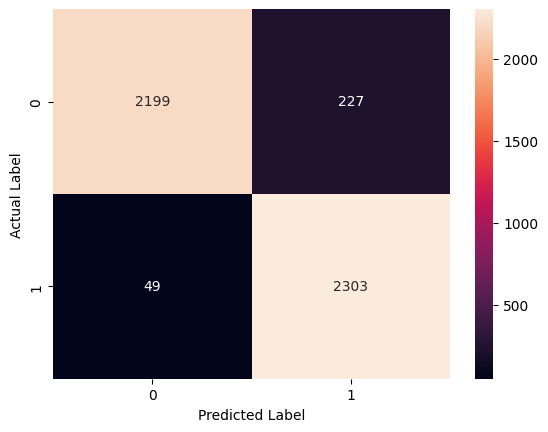

In [ ]:
yo_test_pred = model_rfc.predict(Xo_test_scale)
acc = accuracy_score(yo_test, yo_test_pred)
cm = confusion_matrix(yo_test, yo_test_pred)
sns.heatmap(cm, annot = True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

- **True Positive** = 2303
- **True Negative** = 2199
- **False Positive** = 227
- **False Negative** = 49
- Có thể thấy với kỹ thuật xử lý **RandomOverSample**, tỉ lệ dự đoán sai của model là rất thấp ==> Hiệu quả

### **SMOTE** train and evaluate model

#### **Train Model**

In [ ]:
model_lrc.fit(Xsm_train_scale,ysm_train)
model_svc.fit(Xsm_train_scale,ysm_train)
model_knc.fit(Xsm_train_scale,ysm_train)
model_dtc.fit(Xsm_train_scale,ysm_train)
model_nbc.fit(Xsm_train_scale,ysm_train)
model_rfc.fit(Xsm_train_scale,ysm_train)

RandomForestClassifier()

#### **Evaluate Model**

##### Logistic Regression

In [ ]:
ysm_pred = model_lrc.predict(Xsm_train_scale)
print(classification_report(ysm_train,ysm_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      5537
           1       0.72      0.73      0.73      5611

    accuracy                           0.72     11148
   macro avg       0.72      0.72      0.72     11148
weighted avg       0.72      0.72      0.72     11148



In [ ]:
ysm_pred = model_lrc.predict(Xsm_test_scale)
print(classification_report(ysm_test,ysm_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      2426
           1       0.71      0.73      0.72      2352

    accuracy                           0.72      4778
   macro avg       0.72      0.72      0.72      4778
weighted avg       0.72      0.72      0.72      4778



- Model **Logistic Regression** có độ chính xác xấp xỉ như những model trên ==> Model này không hiệu quả cho data được cho

##### SVC

In [ ]:
ysm_pred = model_svc.predict(Xsm_train_scale)
print(classification_report(ysm_train,ysm_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5537
           1       0.92      0.85      0.88      5611

    accuracy                           0.89     11148
   macro avg       0.89      0.89      0.89     11148
weighted avg       0.89      0.89      0.89     11148



In [ ]:
ysm_pred = model_svc.predict(Xsm_test_scale)
print(classification_report(ysm_test,ysm_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2426
           1       0.89      0.83      0.86      2352

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778



- Độ chính xác trên model **SVC** vẫn luôn nằm ở mức lý tưởng cho cả 4 cách 
- **Train**= 0.89, **Test**= 0.87

##### KNN Classifier

In [ ]:
ysm_pred = model_knc.predict(Xsm_train_scale)
print(classification_report(ysm_train,ysm_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5537
           1       0.89      0.93      0.91      5611

    accuracy                           0.90     11148
   macro avg       0.91      0.90      0.90     11148
weighted avg       0.91      0.90      0.90     11148



In [ ]:
ysm_pred = model_knc.predict(Xsm_test_scale)
print(classification_report(ysm_test,ysm_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2426
           1       0.83      0.86      0.85      2352

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778



- Ở cách xử lý dữ liệu = **SMOTE** các model đang có xư hướng có độ chính xác cao 
- Model **KNN Classifier** có độ chính xác **Train**= 0.9, **Test**=0.85

##### GaussianNB

In [ ]:
ysm_pred = model_nbc.predict(Xsm_train_scale)
print(classification_report(ysm_train,ysm_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      5537
           1       0.76      0.72      0.74      5611

    accuracy                           0.75     11148
   macro avg       0.75      0.75      0.75     11148
weighted avg       0.75      0.75      0.75     11148



In [ ]:
ysm_pred = model_nbc.predict(Xsm_test_scale)
print(classification_report(ysm_test,ysm_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      2426
           1       0.75      0.74      0.74      2352

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



- Model **GaussianNB** cho cả 4 hình thức đều có độ chính xác không quá cao
- Không thích hợp sử dụng cho data này

##### Decision Tree Classifier

In [ ]:
ysm_pred = model_dtc.predict(Xsm_train_scale)
print(classification_report(ysm_train,ysm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5537
           1       1.00      1.00      1.00      5611

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148



In [ ]:
ysm_pred = model_dtc.predict(Xsm_test_scale)
print(classification_report(ysm_test,ysm_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2426
           1       0.84      0.86      0.85      2352

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778



##### Random Forest Classifier

In [ ]:
ysm_pred = model_rfc.predict(Xsm_train_scale)
print(classification_report(ysm_train,ysm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5537
           1       1.00      1.00      1.00      5611

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148



In [ ]:
ysm_pred = model_rfc.predict(Xsm_test_scale)
print(classification_report(ysm_test,ysm_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2426
           1       0.94      0.88      0.91      2352

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



- Model **Random Forest Classifier** luôn cho ra độ chính xác cao nhất 
- **Train**: 100%, **Test**: 91%

#### **Conclusion 4**

- Với cách xử lý **OverSampling** = **SMOTE**, model cho ra độ chính xác cao nhất là **Random Forest Classifier**
- Tuy nhiên có những model ở cách xử lý dữ liệu này có độ chính xác cao hơn 3 cách trước là **SVC**, **KNN Classifier**

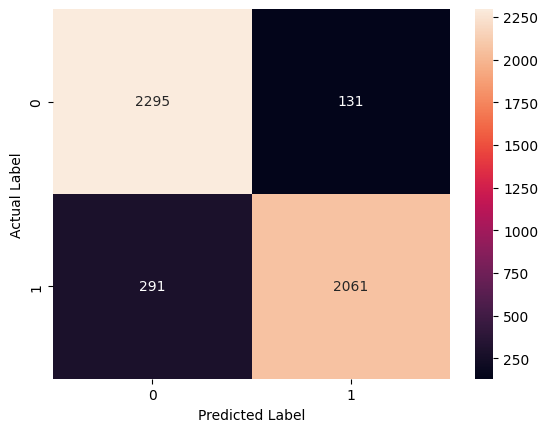

In [ ]:
ysm_test_pred = model_rfc.predict(Xsm_test_scale)
acc = accuracy_score(ysm_test, ysm_test_pred)
cm = confusion_matrix(ysm_test, ysm_test_pred)
sns.heatmap(cm, annot = True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

- Model **Random Forest Classifier** của **SMOTE**:
- **True Positive**: 2061
- **True Negative**: 2295
- **False Positive**: 131
- **False Negative**: 291

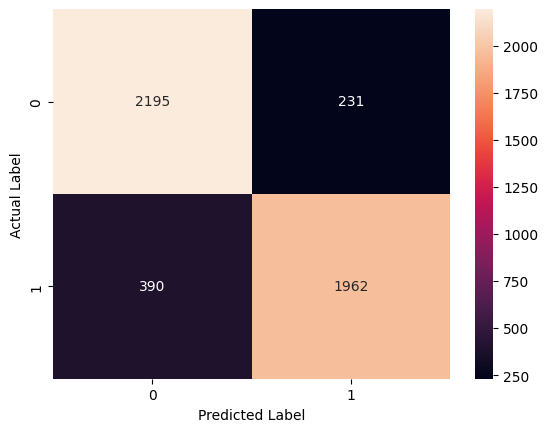

In [ ]:
ysm_test_pred = model_svc.predict(Xsm_test_scale)
acc = accuracy_score(ysm_test, ysm_test_pred)
cm = confusion_matrix(ysm_test, ysm_test_pred)
sns.heatmap(cm, annot = True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

- Model **SVC** của **SMOTE**:
- **True Positive**: 1962
- **True Negative**: 2195
- **False Positive**: 231
- **False Negative**: 390

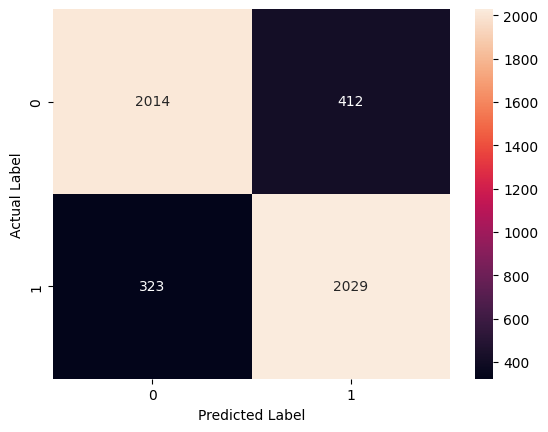

In [ ]:
ysm_test_pred = model_knc.predict(Xsm_test_scale)
acc = accuracy_score(ysm_test, ysm_test_pred)
cm = confusion_matrix(ysm_test, ysm_test_pred)
sns.heatmap(cm, annot = True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

- Model **KNN Classifier** của **SMOTE**:
- **True Positive**: 2029
- **True Negative**: 2014
- **False Positive**: 412
- **False Negative**: 323

## **Conclusion**

- Với dữ liệu trên, sử dụng **OverSampling** để xử lý dữ liệu mất cân bằng là hiệu quả nhất
- Bằng cách sử dụng **Random Over Sample**, độ chính xác của model **Random Forest Classifier** đạt ngưỡng cao nhất là (**Train**= 1 và **Test**= 0.94)
- Model có độ chính xác cao nhất trong cả 2 cách **RandomOverSample** và **SMOTE** đều là **Random Forest Classifier** ==> Model hiệu quả nhất
- Ngoài ra vẫn có một số model nên cân nhắc như: **SVC** và **KNN Classifier**

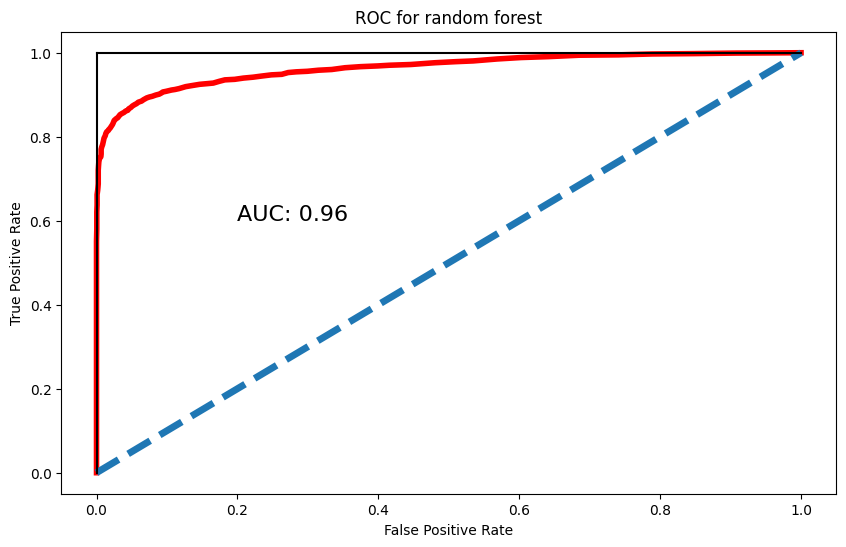

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
ysm_probabilities = model_rfc.predict_proba(Xsm_test_scale)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(ysm_test,ysm_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(ysm_test,ysm_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from joblib import dump
path = "model_rf_bank.joblib"
dump(model_rfc, path)

['model_rf_bank.joblib']